### Generador de grafos no dirigidos
Construya un generador de grafos no dirigidos, no ponderados, cuyos parámetros de
entrada son |V | = n (número de nodos), y k (tamaño del clique máximo k < n). El grafo generado
debe tener n nodos y un clique máximo de tamaño k y aristas aleatorias. El formato de salida se
debe especificar en un archivo README.

In [26]:
def crear_arista(grafo:dict, origen:int,destino:int):
    adyacentes_origen=grafo[origen]
    if destino not in adyacentes_origen:
        adyacentes_origen.append(destino)
    adyacentes_origen.sort() # No es necesario pero para que se vea más bonito xd
    adyacentes_destino = grafo[destino]
    if origen not in adyacentes_destino:
        adyacentes_destino.append(origen)
    adyacentes_destino.sort()
    

In [27]:
import random as rand
def generador(num_nodos:int, tamanio_clique:int)->tuple:
    if tamanio_clique>=num_nodos:
        return {}
    
    # Estructuras iniciales
    nodos_clique=[]
    grafo={}
    
    # Crear las listas de adyacencia
    for i in range(num_nodos):
        grafo[i]=[]

    # Generar los nodos random que van a hacer parte del clique
    while len(nodos_clique)<tamanio_clique:
        nodo_random = rand.randrange(0,num_nodos)
        if nodo_random not in nodos_clique:
            nodos_clique.append(nodo_random)
    
    # Generar las aristas no dirigidas y no ponderadas del clique     
    
    for idx_origen in range(len(nodos_clique)):
        for idx_destino in range(idx_origen+1,len(nodos_clique)):
            crear_arista(grafo,nodos_clique[idx_origen],nodos_clique[idx_destino])
            
    num_aristas_clique=tamanio_clique*(tamanio_clique-1)//2
    num_aristas_total=num_nodos*(num_nodos-1)//2
    
    # Aristas aleatorias
    aristas_extra=rand.randrange(1,num_aristas_total-num_aristas_clique-1)//3 #-1 y // 3 para que no termine de generar un grafo completo
    aristas_creadas=0
    
    while aristas_creadas<aristas_extra:
        origen_random = rand.randint(0,num_nodos-1)
        destino_random = rand.randint(0,num_nodos-1)
        if origen_random!=destino_random and origen_random not in grafo[destino_random] and destino_random not in grafo[origen_random]:
            crear_arista(grafo,origen_random,destino_random)
            aristas_creadas+=1
            
    return nodos_clique,grafo,aristas_extra
print(generador(100,20))

([66, 87, 56, 51, 4, 25, 94, 9, 73, 33, 17, 83, 30, 79, 76, 18, 81, 0, 29, 16], {0: [4, 9, 10, 13, 16, 17, 18, 24, 25, 26, 29, 30, 33, 34, 46, 48, 51, 55, 56, 66, 70, 73, 74, 76, 79, 81, 83, 87, 93, 94, 95], 1: [2, 17, 21, 53, 55, 60, 64, 69, 77, 78, 93], 2: [1, 5, 12, 19, 23, 31, 32, 34, 49, 72, 86, 92], 3: [4, 28, 75, 79, 81, 92], 4: [0, 3, 8, 9, 16, 17, 18, 25, 26, 29, 30, 33, 34, 40, 46, 49, 51, 56, 57, 66, 73, 76, 78, 79, 81, 83, 87, 93, 94], 5: [2, 6, 17, 38, 41, 53, 57, 62, 65, 78, 82, 83], 6: [5, 19, 22, 23, 37, 38, 43, 57, 60, 68, 71, 75, 86, 95], 7: [15, 45, 75, 84], 8: [4, 15, 31, 39, 41, 66, 69, 72, 84, 86, 87, 99], 9: [0, 4, 16, 17, 18, 21, 25, 29, 30, 32, 33, 49, 51, 56, 66, 73, 76, 79, 81, 83, 87, 94], 10: [0, 26, 35, 38, 43, 68, 79, 87, 93], 11: [23, 24, 29, 31, 36, 53, 65, 72, 82, 86, 96], 12: [2, 27, 37, 53, 56, 70, 71], 13: [0, 20, 25, 26, 45, 58, 66, 73, 84, 86, 92, 99], 14: [18, 29, 33, 35, 70, 85, 96], 15: [7, 8, 65, 76, 91], 16: [0, 4, 9, 17, 18, 19, 20, 21, 25, 

## Algoritmo Genético
Aquí iría un increible algoritmo genético

In [28]:
import pyeasyga.pyeasyga as galib

In [29]:
num_nodos = int(input("Ingrese el número de nodos en el grafo (n): "))
clique_max = int(input("Ingrese el clique máximo que desea en el grafo (k<n): "))
nodos_clique,grafo,aristas_extra=generador(num_nodos,clique_max)

ValueError: invalid literal for int() with base 10: ''

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
def dibujar_grafo(grafo):
    G = nx.DiGraph()

    for origen, destinos in grafo.items():
        for destino in destinos:
            G.add_edge(origen, destino)

    plt.figure(figsize=(15, 15))
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=200, arrowstyle='-|>', arrowsize=2)
    plt.title("Grafo")
    plt.show()
dibujar_grafo(grafo)

In [ ]:
ga = galib.GeneticAlgorithm(grafo,population_size=50,
                           generations=10000,
                           crossover_probability=0.8,
                           mutation_probability=0.05,
                           elitism=True,
                           maximise_fitness=True)

##### Representación
La representación para el grafo va a ser en la forma de una lista [], cuya longitud será en el rango $[0,N]$, donde $N$ es el número de nodos del grafo. Esta longitud puede ser variante para representar los nodos que hacen parte de la instancia del individuo para el clique.

In [ ]:
def crear_individuo(data):
    individuo=[0 for _ in range(len(data))]
    
    numero_elementos=rand.randint(1,len(data)-1)
    
    elementos_agregados=0
    while elementos_agregados < numero_elementos:
        nodo_random= rand.randint(0,len(individuo)-1)
        if individuo[nodo_random]==0:
            individuo[nodo_random] = 1
            elementos_agregados += 1
            
    return individuo

ga.create_individual=crear_individuo

In [ ]:
def crossover(padre_1, padre_2):
    idx_minimo= rand.randint(1,len(padre_1)-1)
    hijo_1 = padre_1[:idx_minimo] + padre_2[idx_minimo:]
    hijo_2 = padre_1[idx_minimo:] + padre_2[:idx_minimo]
    return hijo_1,hijo_2  

def mutacion(individuo):
    indice_mutar = rand.randint(0,len(individuo)-1)
    if individuo[indice_mutar]==0:
        individuo[indice_mutar]=1
    else:
        individuo[indice_mutar]=0
            
def selection(population):
    return rand.choice(population)

ga.crossover_function=crossover
ga.mutate_function=mutacion
ga.selection_function=selection


In [ ]:
def fitness(individual, data):
    # Obtener todos los nodos activados
    nodos_activos = []
    
    for i in range(len(individual)):
        if individual[i] == 1:
            nodos_activos.append(i)
    
    # Si hay menos de 2 nodos activados, si es un clique
    if len(nodos_activos) < 2:
        return len(nodos_activos)
    penalizacion=0
    # Verificar que cada par de nodos activos esté conectado
    for i in range(len(nodos_activos)):
        for j in range(i + 1, len(nodos_activos)):
            if nodos_activos[j] not in data[nodos_activos[i]] or nodos_activos[i] not in data[nodos_activos[j]]:
                # Si falta al menos una conexión, no es un clique
                return 0
                
    # Si se cumple la condición de clique se retorna su tamaño
    return len(nodos_activos)

In [32]:
def fitness2(individual, data):
    # Obtener todos los nodos activados
    nodos_activos = []
    
    for i in range(len(individual)):
        if individual[i] == 1:
            nodos_activos.append(i)
    

    penalizacion=0
    # Verificar que cada par de nodos activos esté conectado
    conexiones={}    
    for i in range(len(nodos_activos)):
        for j in range(i+1,len(nodos_activos)):
            if nodos_activos[i] not in grafo[nodos_activos[j]] and (nodos_activos[i],nodos_activos[j]) not in conexiones and (nodos_activos[j],nodos_activos[i]) not in conexiones:
                conexiones[(nodos_activos[i],nodos_activos[j])] = 1
                penalizacion+=0.5
    # Si se cumple la condición de clique se retorna su tamaño
    return len(nodos_activos) - penalizacion

In [53]:
input_recibido=input("Fitness 1 o fitness 2? (1/2): ")
if input_recibido=="1":
    ga.fitness_function=fitness
else:
    ga.fitness_function=fitness2

In [54]:
ga.run()

In [55]:

nodos_clique.sort()
print("Clique generado: ",nodos_clique)
nodos_encontrados=[]
for i in range(len(ga.best_individual()[1])):
    if ga.best_individual()[1][i]==1:
        nodos_encontrados.append(i)
print("Nodos encontrados: ", nodos_encontrados)
list_comunes= []
for i in nodos_clique:
    if i in nodos_encontrados and i not in list_comunes:
        list_comunes.append(i)
print("Nodos comunes: ", list_comunes, " con ", len(list_comunes), " nodos")

Clique generado:  [5, 6, 11, 12, 13, 15, 20, 21, 24, 31, 32, 33, 34, 36, 37, 38, 43, 49, 52, 53, 61, 64, 67, 74, 76, 80, 81, 82, 84, 86]
Nodos encontrados:  [5, 6, 11, 13, 15, 20, 21, 24, 31, 32, 33, 34, 37, 38, 43, 49, 52, 53, 61, 64, 67, 74, 76, 80, 81, 82, 84]
Nodos comunes:  [5, 6, 11, 13, 15, 20, 21, 24, 31, 32, 33, 34, 37, 38, 43, 49, 52, 53, 61, 64, 67, 74, 76, 80, 81, 82, 84]  con  27  nodos


### Estadistica 🤓☝️

In [56]:
import pandas as pd
def obtener_promedio(generacion:list):
    suma=0
    for i in range(len(generacion)):
        suma+=generacion[i][0]
    return suma/len(generacion)

def crear_dataframe_avg_fitness(ga : galib.GeneticAlgorithm):
    data = []
    for i in range(len(ga.get_history())):
        promedio_fitness=obtener_promedio(ga.get_history()[i])
        data.append([i, promedio_fitness])
    df = pd.DataFrame(data, columns=["Generacion", "Fitness"])
    return df

def crear_dataframe_mejor_individuo(ga : galib.GeneticAlgorithm):
    data = []
    for i in range(len(ga.get_history())):
        mejor_individuo=ga.get_history()[i][0]
        data.append([i, mejor_individuo[0]])
    df = pd.DataFrame(data, columns=["Generacion", "Fitness"])
    return df
df_avg_fitness = crear_dataframe_avg_fitness(ga)
df_mejor_individuo = crear_dataframe_mejor_individuo(ga)

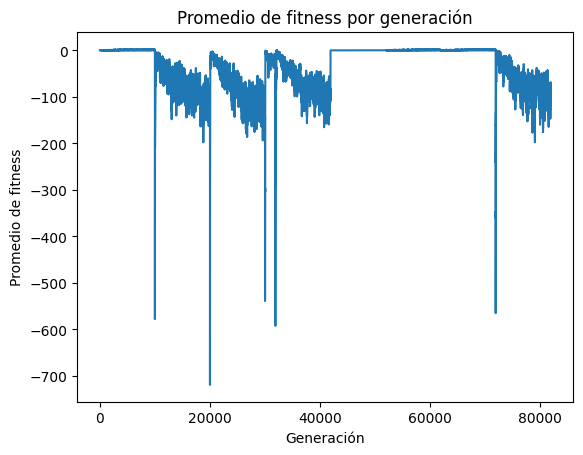

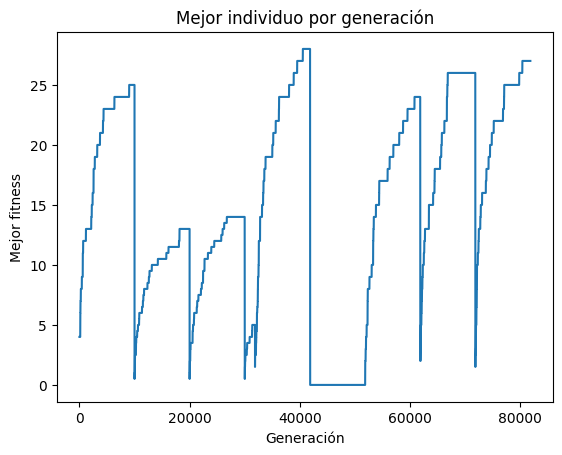

: 

In [ ]:
import matplotlib.pyplot as plt
def graficar_avg_fitness(df_avg_fitness):
    plt.plot(df_avg_fitness["Generacion"], df_avg_fitness["Fitness"])
    plt.title("Promedio de fitness por generación")
    plt.xlabel("Generación")
    plt.ylabel("Promedio de fitness")
    plt.show()
graficar_avg_fitness(df_avg_fitness)
def graficar_mejor_individuo(df_mejor_individuo):
    plt.plot(df_mejor_individuo["Generacion"], df_mejor_individuo["Fitness"])
    plt.title("Mejor individuo por generación")
    plt.xlabel("Generación")
    plt.ylabel("Mejor fitness")
    plt.show()
graficar_mejor_individuo(df_mejor_individuo)